In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [35]:
csv_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
tips =  pd.read_csv(csv_url)

In [36]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [37]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [38]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [39]:
tips.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [40]:
print("Average tip per smoking person:\t\t\t", tips[tips["smoker"] == "Yes"]["tip"].mean()) # filtering by applying conditional check (smoker=yes)

# mean total bill among smokers
print("Average total bill among smokers:\t\t", tips[tips["smoker"] == "Yes"]["total_bill"].mean())

# mean ratio among smokers
tips["ratio_smoke"] = tips[tips["smoker"] == "Yes"]["tip"] / tips[tips["smoker"] == "Yes"]["total_bill"]
print("Average ratio tip to total bill among smokers:\t", tips["ratio_smoke"].mean())

Average tip per smoking person:			 3.008709677419355
Average total bill among smokers:		 20.756344086021507
Average ratio tip to total bill among smokers:	 0.16319604463687792


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


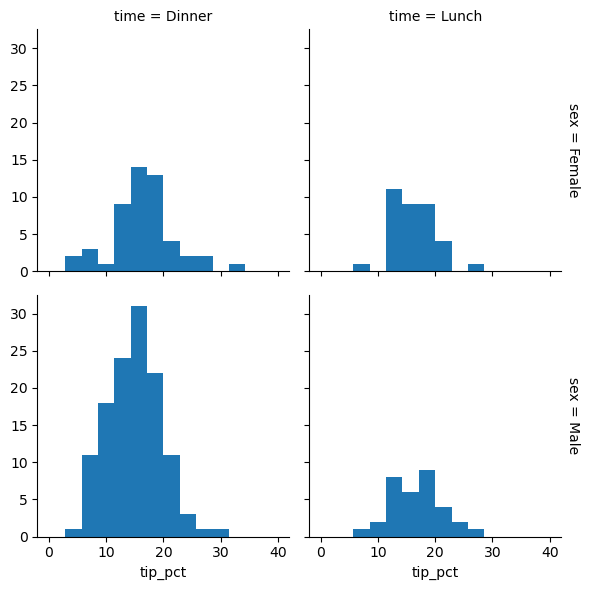

In [41]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

Text(0, 0.5, 'Tip in $')

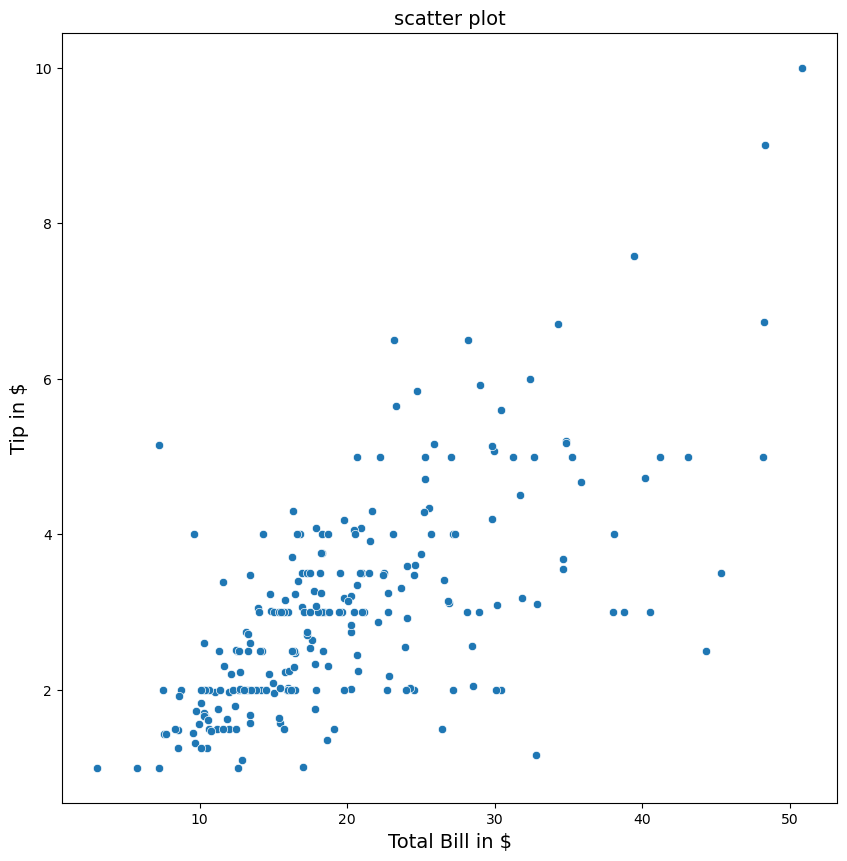

In [42]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)
ax.set_title("scatter plot", fontsize="14")
plt.xlabel('Total Bill in $', fontsize='14')
plt.ylabel('Tip in $', fontsize='14')


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\keith\anaconda3\Lib\s

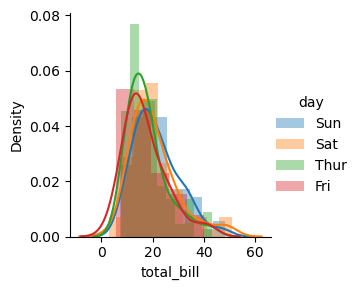

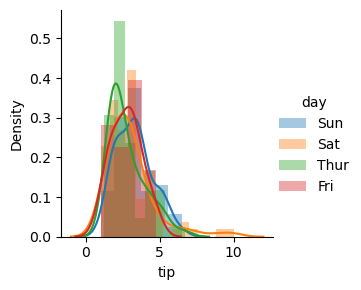

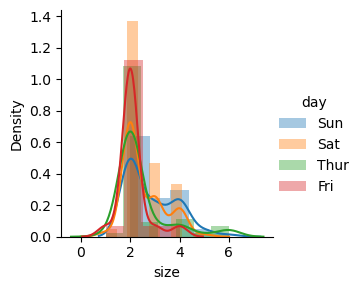

In [43]:
sns.FacetGrid(tips, hue="day") \
.map(sns.distplot, "total_bill") \
.add_legend()

sns.FacetGrid(tips, hue="day") \
.map(sns.distplot, "tip") \
.add_legend()




sns.FacetGrid(tips, hue="day") \
.map(sns.distplot, "size") \
.add_legend()
plt.show()

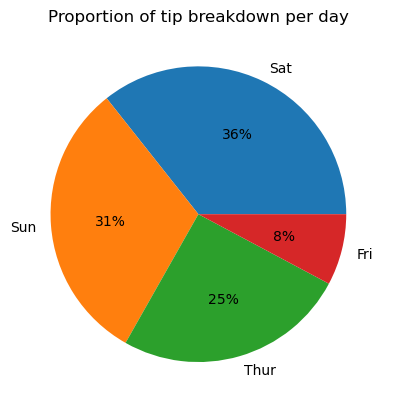

In [44]:
total_tip_counts = tips['day'].value_counts()
plt.pie(total_tip_counts, labels=total_tip_counts.index, autopct='%.0f%%')
plt.title('Proportion of tip breakdown per day')
plt.show()

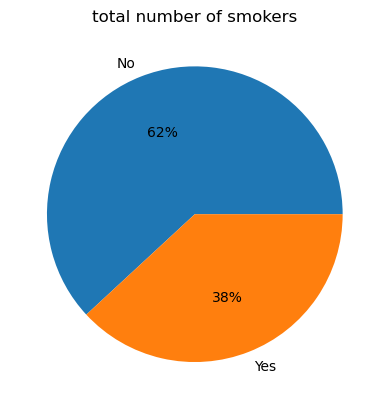

In [46]:
smoker_counts = tips['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%.0f%%')
plt.title('total number of smokers')
plt.show()

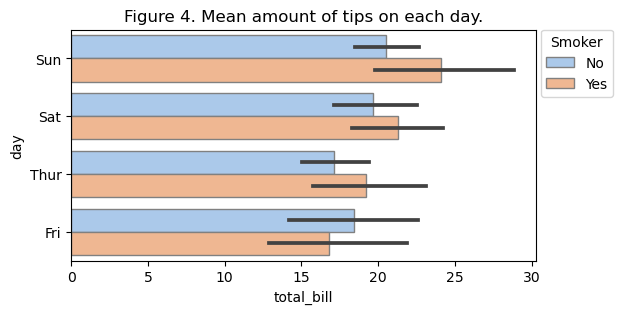

In [78]:
fig, ax = plt.subplots(ncols=1, figsize=(6,3))
plt.title('Figure 4. Mean amount of tips on each day.')

# Mean amount of tip on each day
sns.barplot(data = tips, x = "total_bill", y = "day", hue="smoker", palette="pastel", edgecolor=".5")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0, title="Smoker") # legend put outside of the plot area

plt.show()

In [83]:
z = tips['total_bill']

x = z.values.reshape(-1,1)
x.shape

(244, 1)

In [84]:
y = tips['tip']
y.shape

(244,)

In [85]:
model = LinearRegression()
results = model.fit(x, y)

Text(0, 0.5, 'Tip in $')

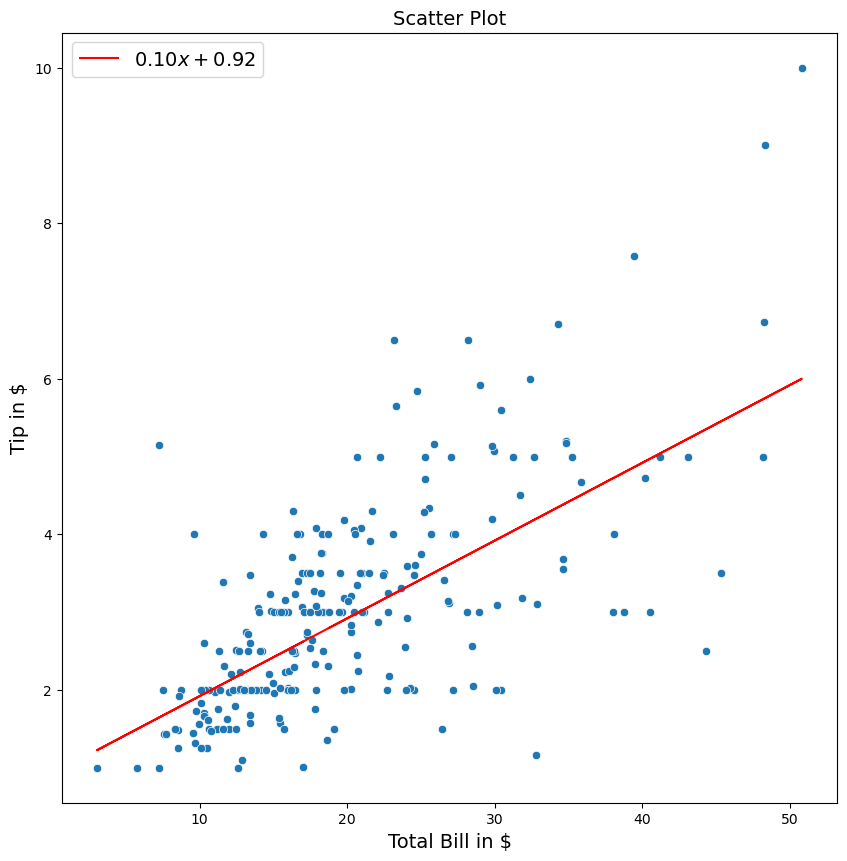

In [86]:
plt.figure(figsize=(10, 10))
ax = plt.plot(x, 0.10 * x + 0.92, 'r-', label=r"$0.10x + 0.92$")
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)
ax.legend(fontsize='14')
ax.set_title('Scatter Plot', fontsize='14')
plt.xlabel('Total Bill in $', fontsize='14')
plt.ylabel('Tip in $', fontsize='14')

In [87]:
R_sqr = model.score(x, y)
print (f'R square is equal: {R_sqr}')

R square is equal: 0.45661658635167657


In [90]:
from statsmodels.formula.api import ols
# fit the model
model = ols('tip ~ total_bill', data=tips).fit()
# the detailed statistics derived from the fit
model.summary()
# just the paramters for the intercept and coefficient
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           6.69e-34
Time:                        22:08:11   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [94]:
print("The correlation coefficient between total bill and tip amount is %.3f" %tips['total_bill'].corr(tips['tip']))
print(f"The coefficient of determination R squared is {np.corrcoef(tips['total_bill'],tips['tip'])[0][1]**2:.4f}")
print(f"The estimates for the slope and intercept parameters are {np.polyfit(tips['total_bill'],tips['tip'],1)[1]:.4f} and {np.polyfit(tips['total_bill'],tips['tip'],1)[0]:.4f} ")

The correlation coefficient between total bill and tip amount is 0.676
The coefficient of determination R squared is 0.4566
The estimates for the slope and intercept parameters are 0.9203 and 0.1050 


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


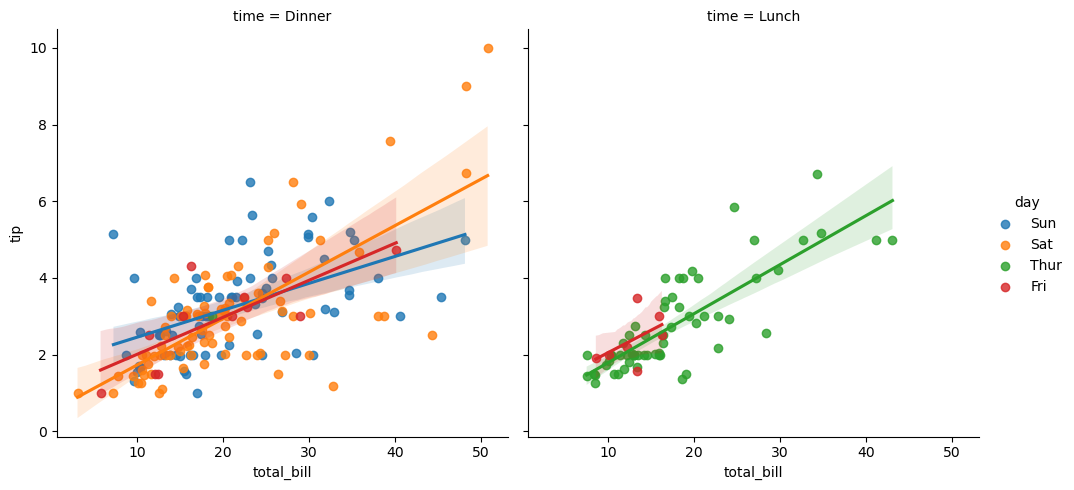

In [95]:
sns.lmplot(x='total_bill', y='tip', hue="day",col="time",data=tips)

c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


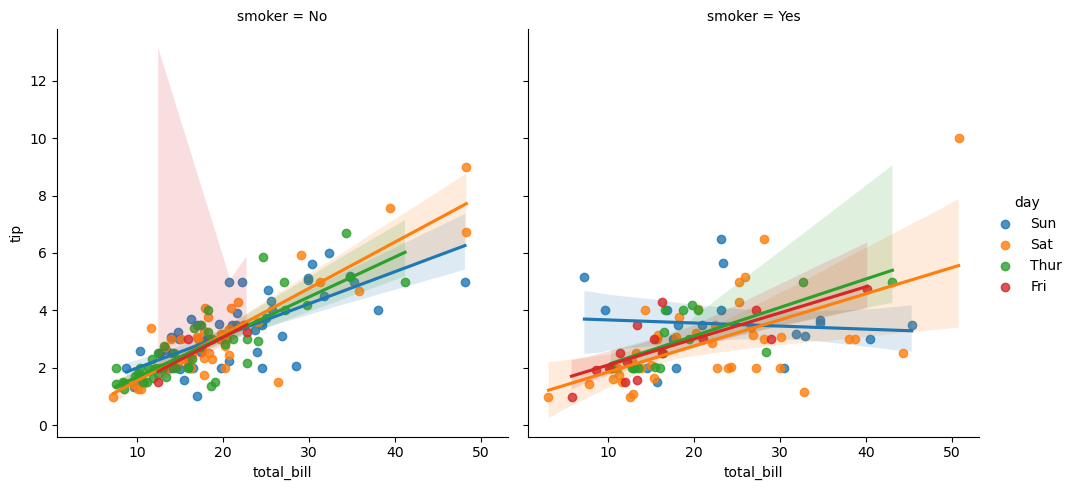

In [96]:
sns.lmplot(x='total_bill', y='tip', hue="day",col="smoker",data=tips)